# RockPaperScissors using Convolutional Neural Network with Tensorflow

Data diri:
#    Nama : Muhammad Syamil
#    Asal : Kota Depok, Jawa Barat

In [1]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-01 04:09:09--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.44MB/s    in 44s     

2020-11-01 04:09:55 (6.95 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()
#ekstrak zip file

In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import library yang akan digunakan di CNN

In [11]:
import os
os.listdir('/tmp/rockpaperscissors')


['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [12]:

print(len(os.listdir('/tmp/rockpaperscissors/rock')),
len(os.listdir('/tmp/rockpaperscissors/paper')),
len(os.listdir('/tmp/rockpaperscissors/scissors')))
#untuk mengetahui jumlah paper, rock, scissor

726 712 750


In [20]:
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
#menamai direktori

os.mkdir(train_dir)
os.mkdir(validation_dir)
#membuat direktori train dan validation

In [23]:
os.listdir('/tmp/rockpaperscissors/train')
os.listdir('/tmp/rockpaperscissors/val')

[]

In [26]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [28]:
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [29]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [32]:
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)
  #membuat direktori baru

In [33]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))
#mengopi data ke direktori baru

In [37]:
paper_imgs = os.listdir(train_paper)
rock_imgs = os.listdir(train_rock)
scissors_imgs = os.listdir(train_scissors)

In [39]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import matplotlib untuk digunakan

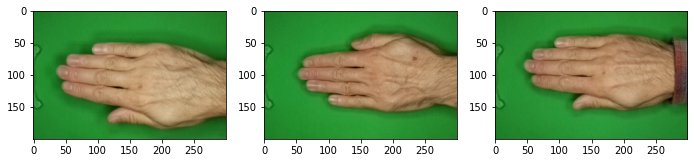

In [41]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(paper_imgs[:3]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(train_paper, img_path))
    plt.imshow(img)
plt.show()


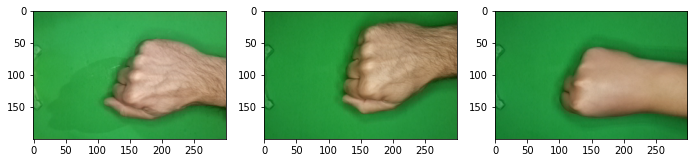

In [43]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(rock_imgs[:3]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(train_rock, img_path))
    plt.imshow(img)
plt.show()

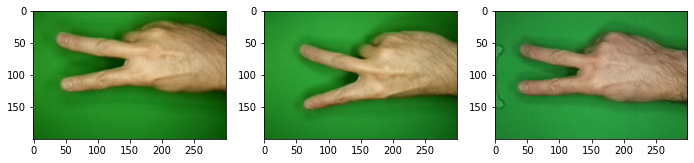

In [46]:
plt.figure(figsize=(20, 4))
for i, img_path in enumerate(scissors_imgs[:3]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(train_scissors, img_path))
    plt.imshow(img)
plt.show()

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [59]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)
#augmentasi data gambar

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [60]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])
#menggunakan fungsi softmax untuk multikelas
#membuat model CNN

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 256)      

In [62]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])
#menggunakan categorical untuk klasifikasi >2 kelas

In [63]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 44s - loss: 1.1087 - accuracy: 0.4050 - val_loss: 0.9879 - val_accuracy: 0.4250
Epoch 2/20
25/25 - 43s - loss: 0.7724 - accuracy: 0.6375 - val_loss: 0.4627 - val_accuracy: 0.8313
Epoch 3/20
25/25 - 43s - loss: 0.3840 - accuracy: 0.8600 - val_loss: 0.3466 - val_accuracy: 0.8687
Epoch 4/20
25/25 - 43s - loss: 0.3019 - accuracy: 0.8825 - val_loss: 0.1953 - val_accuracy: 0.9375
Epoch 5/20
25/25 - 43s - loss: 0.1973 - accuracy: 0.9375 - val_loss: 0.2010 - val_accuracy: 0.9375
Epoch 6/20
25/25 - 43s - loss: 0.1985 - accuracy: 0.9200 - val_loss: 0.2306 - val_accuracy: 0.9563
Epoch 7/20
25/25 - 43s - loss: 0.1220 - accuracy: 0.9563 - val_loss: 0.1024 - val_accuracy: 0.9812
Epoch 8/20
25/25 - 43s - loss: 0.1945 - accuracy: 0.9425 - val_loss: 0.1934 - val_accuracy: 0.9375
Epoch 9/20
25/25 - 43s - loss: 0.1146 - accuracy: 0.9600 - val_loss: 0.1769 - val_accuracy: 0.9563
Epoch 10/20
25/25 - 43s - loss: 0.0958 - accuracy: 0.9663 - val_loss: 0.1901 - val_accuracy: 0.9625
Epoch 11/

In [64]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

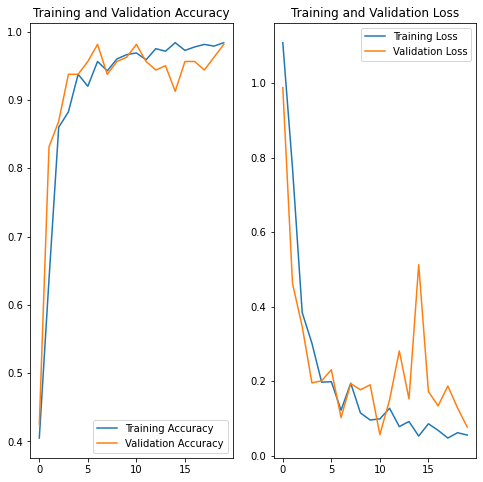

In [65]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving 0Og76sl5CJhbxWWx.png to 0Og76sl5CJhbxWWx.png
0Og76sl5CJhbxWWx.png
paper


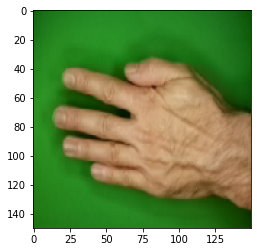

In [66]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')
#prediksi gambar

In [68]:
#Data diri:
#    Nama : Muhammad Syamil
#    Asal : Kota Depok, Jawa Barat

references: 

https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb#scrollTo=L-ACu_RnmiBG
https://towardsdatascience.com/building-a-rock-paper-scissors-ai-using-tensorflow-and-opencv-d5fc44fc8222
https://www.dicoding.com/academies/184/tutorials/8527
